In [283]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


##  diviser mon dataset pour les entrainé et testé 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [284]:
data_olympic=pd.read_excel('data/olympic_final.xlsx')

In [285]:
data_olympic.head()

,discipline_title,event_title,event_gender,participant_type,athlete_full_name,country_name,games_participations,athlete_year_birth,nb_gold,nb_silver,nb_bronze,Medals,game_end_date,game_start_date,game_location,game_season,game_year,city_location
0,Curling,Mixed Doubles,Mixed,GameTeam,Stefania CONSTANTINI,Italy,1,1999,1,0,0,1,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Winter,2022,Beijing
1,Curling,Mixed Doubles,Mixed,GameTeam,Almida DE VAL,Sweden,1,1997,0,0,1,1,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Winter,2022,Beijing
2,Curling,Mixed Doubles,Mixed,GameTeam,Oskar ERIKSSON,Sweden,4,1991,1,1,2,4,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Winter,2022,Beijing
3,Freestyle Skiing,Men's Freeski Big Air,Men,Athlete,Birk RUUD,Norway,1,2000,1,0,0,1,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Winter,2022,Beijing
4,Freestyle Skiing,Men's Freeski Big Air,Men,Athlete,Colby STEVENSON,USA,1,1997,0,1,0,1,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Winter,2022,Beijing


In [286]:
# Sélectionner les colonnes pertinentes
important_columns = ['country_name', 'games_participations', 'nb_gold', 'nb_silver', 'nb_bronze',
                     'game_year', 'game_location',  'Medals']
df = data_olympic[important_columns]

df.head(10)


,country_name,games_participations,nb_gold,nb_silver,nb_bronze,game_year,game_location,Medals
0,Italy,1,1,0,0,2022,China,1
1,Sweden,1,0,0,1,2022,China,1
2,Sweden,4,1,1,2,2022,China,4
3,Norway,1,1,0,0,2022,China,1
4,USA,1,0,1,0,2022,China,1
5,Switzerland,1,1,0,0,2022,China,1
6,China,1,2,1,0,2022,China,3
7,China,1,2,1,0,2022,China,3
8,China,1,2,1,0,2022,China,3
9,Russia,1,0,0,1,2022,China,1


In [287]:
# Adding 'Host column'
df['Host'] = 0
df.loc[df['country_name'] == df['game_location'], 'Host'] = 1

print(df.shape)
df[['country_name','game_location', 'Host']].head()


(25913, 9)


C:\Users\mamou\AppData\Local\Temp\ipykernel_10116\2095946484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Host'] = 0


,country_name,game_location,Host
0,Italy,China,0
1,Sweden,China,0
2,Sweden,China,0
3,Norway,China,0
4,USA,China,0


In [288]:
df.head()

,country_name,games_participations,nb_gold,nb_silver,nb_bronze,game_year,game_location,Medals,Host
0,Italy,1,1,0,0,2022,China,1,0
1,Sweden,1,0,0,1,2022,China,1,0
2,Sweden,4,1,1,2,2022,China,4,0
3,Norway,1,1,0,0,2022,China,1,0
4,USA,1,0,1,0,2022,China,1,0


In [289]:
df.drop(columns=['game_location'], inplace=True)

C:\Users\mamou\AppData\Local\Temp\ipykernel_10116\4008983684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['game_location'], inplace=True)


In [290]:
# Find total count of medals per year per country
medals_df = df.groupby(['game_year','Host','country_name'], sort = False).sum().reset_index()
print(medals_df.shape)
medals_df.head()

(1455, 8)


,game_year,Host,country_name,games_participations,nb_gold,nb_silver,nb_bronze,Medals
0,2022,0,Italy,2,1,0,1,2
1,2022,0,Sweden,12,5,11,7,23
2,2022,0,Norway,11,18,1,11,30
3,2022,0,USA,3,0,1,2,3
4,2022,0,Switzerland,2,2,0,0,2


In [291]:
medals_df = medals_df.sort_values(['game_year','Medals','country_name'], ascending = [True,False,True])

medals_df = medals_df.reset_index(drop=True)

print(medals_df.shape)
medals_df.head(20)

(1455, 8)


,game_year,Host,country_name,games_participations,nb_gold,nb_silver,nb_bronze,Medals
0,1896,0,Germany,12,26,12,6,44
1,1896,1,Greece,38,7,11,14,32
2,1896,0,France,12,13,5,4,22
3,1896,0,Denmark,9,3,6,9,18
4,1896,0,USA,15,11,5,1,17
5,1896,0,Austria,7,4,2,6,12
6,1896,0,Hungary,14,4,3,3,10
7,1896,0,Great Britain,8,4,3,2,9
8,1896,0,Switzerland,3,3,6,0,9
9,1896,0,Australia,2,4,0,2,6


In [292]:
medals_df = medals_df.sort_values(['game_year','Medals','country_name'], ascending = [True,False,True])

medals_df = medals_df.reset_index(drop=True)

print(medals_df.shape)
medals_df.head(20)

(1455, 8)


,game_year,Host,country_name,games_participations,nb_gold,nb_silver,nb_bronze,Medals
0,1896,0,Germany,12,26,12,6,44
1,1896,1,Greece,38,7,11,14,32
2,1896,0,France,12,13,5,4,22
3,1896,0,Denmark,9,3,6,9,18
4,1896,0,USA,15,11,5,1,17
5,1896,0,Austria,7,4,2,6,12
6,1896,0,Hungary,14,4,3,3,10
7,1896,0,Great Britain,8,4,3,2,9
8,1896,0,Switzerland,3,3,6,0,9
9,1896,0,Australia,2,4,0,2,6


In [293]:
top_25 =medals_df.groupby(['country_name']).sum().sort_values(['Medals'], ascending = False).reset_index()
top_25.head()

,country_name,game_year,Host,games_participations,nb_gold,nb_silver,nb_bronze,Medals
0,USA,72920,0,6966,4446,2661,1978,9085
1,Russia,53724,0,5202,3241,2319,1764,7324
2,Germany,67128,1,6239,2735,2358,1922,7015
3,Norway,72976,2,1888,1169,857,560,2586
4,Italy,73036,3,2931,946,787,844,2577


In [294]:
top_25 = top_25.iloc[0:10 ,:]
top_25

,country_name,game_year,Host,games_participations,nb_gold,nb_silver,nb_bronze,Medals
0,USA,72920,0,6966,4446,2661,1978,9085
1,Russia,53724,0,5202,3241,2319,1764,7324
2,Germany,67128,1,6239,2735,2358,1922,7015
3,Norway,72976,2,1888,1169,857,560,2586
4,Italy,73036,3,2931,946,787,844,2577
5,Japan,65388,4,1614,910,700,662,2272
6,France,72954,4,2318,772,619,709,2100
7,China,36084,2,1812,941,638,467,2046
8,Sweden,67126,1,2115,748,685,601,2034
9,Hungary,54970,0,1994,824,603,586,2013


In [295]:
# Assigning Id to each Country
top_25['CountryId'] = [(x+1) for x in range(10)]

In [296]:
top_df = top_25[['country_name', 'CountryId']]
print(top_df.shape)
top_df

(10, 2)


,country_name,CountryId
0,USA,1
1,Russia,2
2,Germany,3
3,Norway,4
4,Italy,5
5,Japan,6
6,France,7
7,China,8
8,Sweden,9
9,Hungary,10


In [297]:
top_25.drop(columns=['country_name'], inplace=True)

In [298]:
top_25

,game_year,Host,games_participations,nb_gold,nb_silver,nb_bronze,Medals,CountryId
0,72920,0,6966,4446,2661,1978,9085,1
1,53724,0,5202,3241,2319,1764,7324,2
2,67128,1,6239,2735,2358,1922,7015,3
3,72976,2,1888,1169,857,560,2586,4
4,73036,3,2931,946,787,844,2577,5
5,65388,4,1614,910,700,662,2272,6
6,72954,4,2318,772,619,709,2100,7
7,36084,2,1812,941,638,467,2046,8
8,67126,1,2115,748,685,601,2034,9
9,54970,0,1994,824,603,586,2013,10


In [299]:
# Séparation des données en ensemble d'entraînement et de test
X = top_25.drop('Medals', axis=1)
y = top_25['Medals']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [300]:
y_train

5    2272
0    9085
7    2046
2    7015
9    2013
4    2577
3    2586
6    2100
Name: Medals, dtype: int64

In [301]:
X_train

,game_year,Host,games_participations,nb_gold,nb_silver,nb_bronze,CountryId
5,65388,4,1614,910,700,662,6
0,72920,0,6966,4446,2661,1978,1
7,36084,2,1812,941,638,467,8
2,67128,1,6239,2735,2358,1922,3
9,54970,0,1994,824,603,586,10
4,73036,3,2931,946,787,844,5
3,72976,2,1888,1169,857,560,4
6,72954,4,2318,772,619,709,7


In [302]:
# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [303]:
# Entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [304]:
# Prédiction
y_pred = model.predict(X_test)


In [305]:
# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 207.5250000000001


In [306]:
# Prédire les médailles pour toutes les données
top_25['Predicted_Medals'] = model.predict(scaler.transform(X))


In [307]:
# Grouper les prédictions par pays et sommer les médailles
top_20_countries = top_25.groupby('CountryId')['Predicted_Medals'].sum().sort_values(ascending=False).head(20)
print(top_20_countries)

CountryId
1     8056.97
2     7306.46
3     6442.90
4     2697.65
5     2517.07
9     2431.51
10    2396.93
6     2237.01
7     2151.40
8     2109.38
Name: Predicted_Medals, dtype: float64


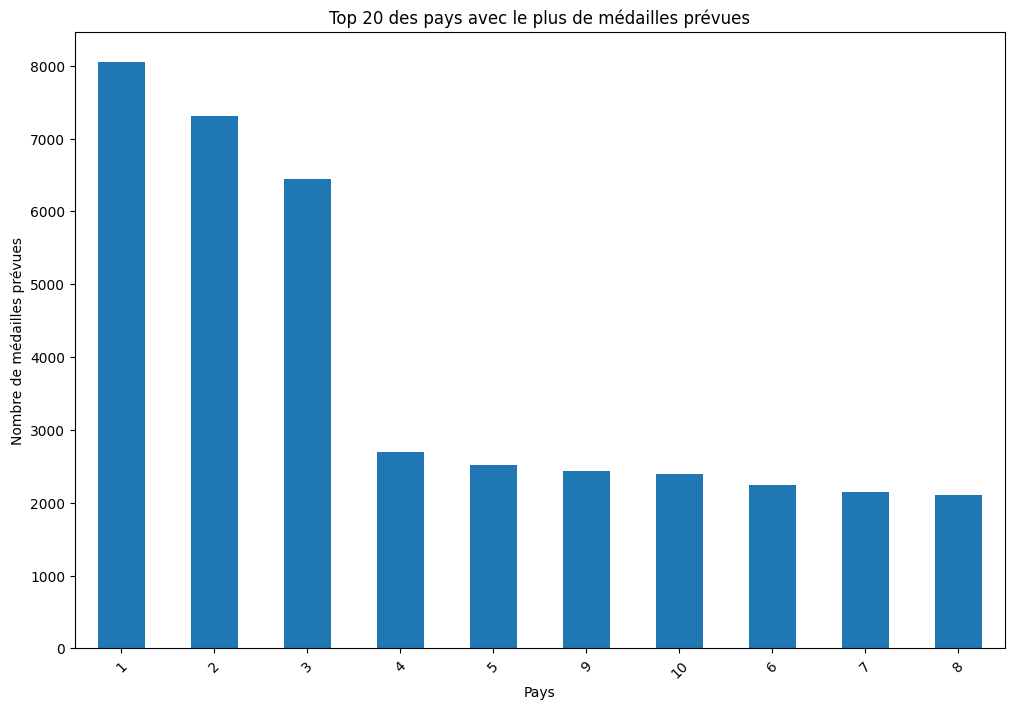

In [308]:
# Visualisation des résultats
top_20_countries.plot(kind='bar', figsize=(12, 8))
plt.title('Top 20 des pays avec le plus de médailles prévues')
plt.xlabel('Pays')
plt.ylabel('Nombre de médailles prévues')
plt.xticks(rotation=45)
plt.show()